In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [24]:
fert = pd.read_csv('../Data-processed/FertilizerData.csv')
crop = pd.read_csv('../Data-processed/CropData.csv')

In [25]:
fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,apple,20,125,200,6.5
1,1,banana,100,75,50,6.5
2,2,blackgram,40,60,20,5.0
3,3,chickpea,40,60,80,5.5
4,4,coconut,20,10,30,5.0


In [26]:
fert.drop('Unnamed: 0',axis = 1,inplace = True)

In [27]:
fert.head()

,Crop,N,P,K,pH
0,apple,20,125,200,6.5
1,banana,100,75,50,6.5
2,blackgram,40,60,20,5.0
3,chickpea,40,60,80,5.5
4,coconut,20,10,30,5.0


In [28]:
fert.describe()

,N,P,K,pH
count,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091
std,36.315715,32.634172,51.698426,0.590326
min,20.000000,10.000000,10.000000,4.000000
25%,20.000000,20.000000,20.000000,5.500000
50%,30.000000,40.000000,30.000000,5.500000
75%,80.000000,60.000000,50.000000,5.500000
max,120.000000,125.000000,200.000000,6.500000


In [29]:
fert['Crop'].unique()

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

Text(0, 0.5, 'Nitrogen (mg/g)')

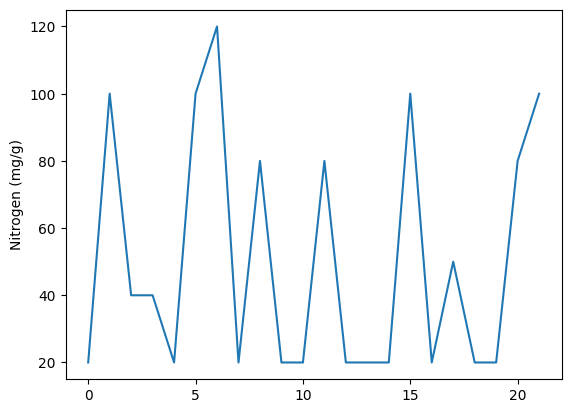

In [30]:
plt.plot(fert["N"])
plt.ylabel('Nitrogen (mg/g)')

Text(0, 0.5, 'Phosphorus (mg/g)')

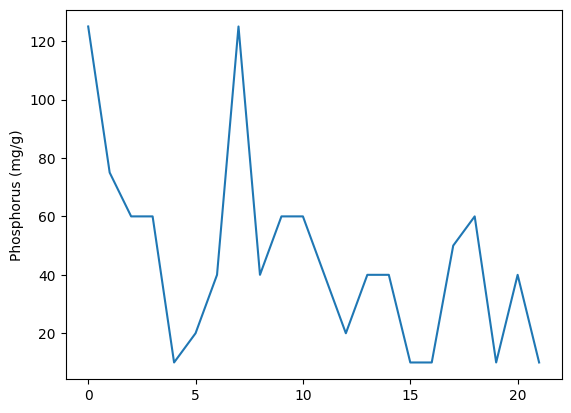

In [31]:
plt.plot(fert["P"])
plt.ylabel('Phosphorus (mg/g)')

Text(0, 0.5, 'Potassium (mg/g)')

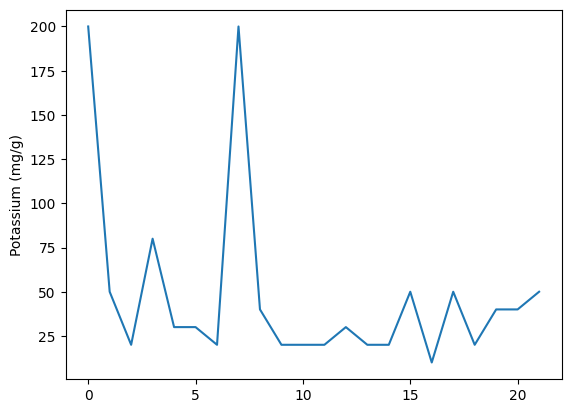

In [32]:
plt.plot(fert["K"])
plt.ylabel('Potassium (mg/g)')

c:\Users\BUTALOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\BUTALOP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


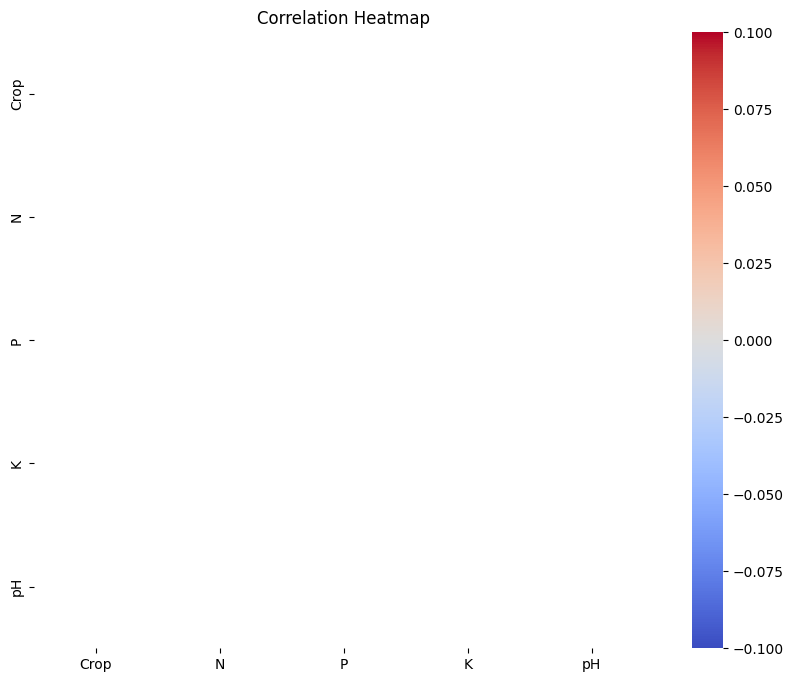

In [35]:
# Convert non-numeric values to NaN
fert_numeric = fert.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
fert_numeric.dropna(inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(fert_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [36]:
r_fert = fert
crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label
0,0,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,2,23.004459,82.320763,7.840207,263.964248,rice
3,3,26.491096,80.158363,6.980401,242.864034,rice
4,4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...
2195,3095,25.287846,89.636679,6.765095,58.286977,watermelon
2196,3096,26.638386,84.695469,6.189214,48.324286,watermelon
2197,3097,25.331045,84.305338,6.904242,41.532187,watermelon
2198,3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [37]:
crop.drop('Unnamed: 0', axis = 1, inplace = True)

In [38]:
crop.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


<b>Adding randomness in the range of tolerance</b>

In [41]:
import random

# Create an empty list to store dictionaries
data = []

# Loop through each crop in the crop DataFrame
for i in range(len(crop)):
    t_crop = crop.label.iloc[i]
    
    # Generate random variations in fertility values
    N = r_fert[r_fert['Crop'] == t_crop]["N"].iloc[0] + random.randint(-20, 20)
    P = r_fert[r_fert['Crop'] == t_crop]["P"].iloc[0] + random.randint(-5, 20)
    K = r_fert[r_fert['Crop'] == t_crop]["K"].iloc[0] + random.randint(-5, 5)
    
    # Create a dictionary for the current crop's fertility values and add it to the list
    data.append({"N": N, "P": P, "K": K})

# Create a DataFrame from the list of dictionaries
temp = pd.DataFrame(data)

# Now temp contains the modified fertility values for each crop


In [42]:
temp

,N,P,K
0,79,51,37
1,62,52,35
2,81,45,39
3,100,39,39
4,91,44,35
...,...,...,...
2195,94,26,55
2196,104,18,51
2197,89,30,55
2198,91,13,48


Merging Crop and fertilizer data

In [43]:
crop['N'] = temp['N']
crop['P'] = temp['P']
crop['K'] = temp['K']

In [44]:
crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,79,51,37
1,21.770462,80.319644,7.038096,226.655537,rice,62,52,35
2,23.004459,82.320763,7.840207,263.964248,rice,81,45,39
3,26.491096,80.158363,6.980401,242.864034,rice,100,39,39
4,20.130175,81.604873,7.628473,262.717340,rice,91,44,35
...,...,...,...,...,...,...,...,...
2195,25.287846,89.636679,6.765095,58.286977,watermelon,94,26,55
2196,26.638386,84.695469,6.189214,48.324286,watermelon,104,18,51
2197,25.331045,84.305338,6.904242,41.532187,watermelon,89,30,55
2198,26.897502,83.892415,6.463271,43.971937,watermelon,91,13,48


In [45]:
crop = crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [46]:
crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [47]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [48]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,79,51,37,20.879744,82.002744,6.502985,202.935536,rice
1,62,52,35,21.770462,80.319644,7.038096,226.655537,rice
2,81,45,39,23.004459,82.320763,7.840207,263.964248,rice
3,100,39,39,26.491096,80.158363,6.980401,242.864034,rice
4,91,44,35,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,94,26,55,25.287846,89.636679,6.765095,58.286977,watermelon
2196,104,18,51,26.638386,84.695469,6.189214,48.324286,watermelon
2197,89,30,55,25.331045,84.305338,6.904242,41.532187,watermelon
2198,91,13,48,26.897502,83.892415,6.463271,43.971937,watermelon
